In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [36]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print(f'Shape Train: X={trainX.shape}, y={trainy.shape}')
print(f'Shape Test: X={testX.shape}, y={testy.shape}')

Shape Train: X=(60000, 28, 28), y=(60000,)
Shape Test: X=(10000, 28, 28), y=(10000,)


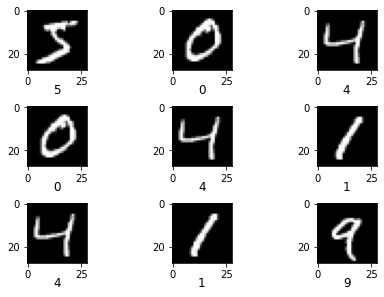

In [37]:
fig, axs = plt.subplots(3, 3, constrained_layout=True)
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(trainX[i+j], cmap=plt.get_cmap('gray'))
        axs[i, j].text(0.5,-0.4, f"{trainy[i+j]}", size=12, ha="center", transform=axs[i, j].transAxes)
plt.show()

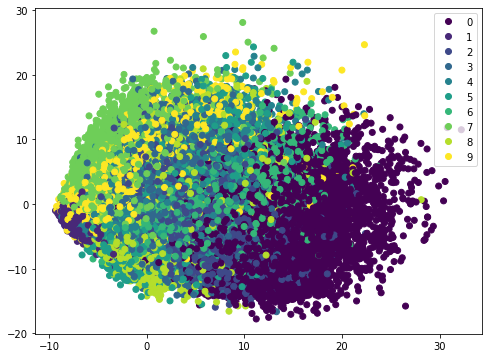

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

flatt_trainX = tf.keras.layers.Flatten(input_shape=(28,28)).call(trainX)
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
Xt = pipe.fit_transform(flatt_trainX)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=trainy)
plt.legend(handles=plot.legend_elements()[0], labels=list([0,1,2,3,4,5,6,7,8,9]))
plt.show()

In [39]:
#normilize
trainX = trainX / 255.
testX = testX / 255.

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [41]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(trainX, trainy, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9264
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1150 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0457 - accuracy: 0.9861


In [43]:
loss, accuracy = model.evaluate(testX, testy)
print(f'accuracy: %{accuracy*100}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9751
accuracy: %97.50999808311462
